# General temporal aggregation methods

In [1]:
# If first time running, uncomment the line below to install any additional dependencies
# !bash requirements-for-notebooks.sh

In [2]:
from earthkit.transforms import aggregate as ekt
from earthkit import data as ekd

from earthkit.data.testing import earthkit_remote_test_data_file
ekd.settings.set("cache-policy", "user")

/tmp/ipykernel_4045/2224411501.py:1: FutureWarning: The 'earthkit.transforms.aggregate' module is deprecated and will be removed in version 2.X of earthkit.transforms. Please import the from earthkit.transforms, e.g.: from earthkit.transforms import spatial
  from earthkit.transforms import aggregate as ekt


## Load some test data

All `earthkit-transforms` methods can be called with `earthkit-data` objects (Readers and Wrappers) or with the 
pre-loaded `xarray`.

In this example we will use hourly ERA5 2m temperature data on a 0.5x0.5 spatial grid for the year 2015 as
our physical data.

First we download (if not already cached) lazily load the ERA5 data (please see tutorials in `earthkit-data` for more details in cache management).

We convert the data to an xarray dataset using some options which are preferred for our handling of the data we are working with. The earthkit transforms methods can handle out of the box earthkit data objects, but for clarity we create the xarray objects here.

In [3]:
# Get some demonstration ERA5 data, this could be any url or path to an ERA5 grib or netCDF file.
remote_era5_file = earthkit_remote_test_data_file("test-data", "era5_temperature_europe_2015.grib")
era5_data = ekd.from_source("url", remote_era5_file)
era5_xr = era5_data.to_xarray(time_dim_mode="valid_time").rename({"2t": "t2m"})

era5_temperature_europe_2015.grib:   0%|          | 0.00/158M [00:00<?, ?B/s]

era5_temperature_europe_2015.grib:   1%|          | 1.00M/158M [00:02<06:27, 423kB/s]

era5_temperature_europe_2015.grib:   1%|▏         | 2.00M/158M [00:03<04:24, 618kB/s]

era5_temperature_europe_2015.grib:   2%|▏         | 3.00M/158M [00:04<03:23, 796kB/s]

era5_temperature_europe_2015.grib:   3%|▎         | 4.00M/158M [00:05<02:46, 970kB/s]

era5_temperature_europe_2015.grib:   3%|▎         | 5.00M/158M [00:05<02:09, 1.24MB/s]

era5_temperature_europe_2015.grib:   4%|▍         | 6.00M/158M [00:06<01:47, 1.48MB/s]

era5_temperature_europe_2015.grib:   4%|▍         | 7.00M/158M [00:06<01:32, 1.70MB/s]

era5_temperature_europe_2015.grib:   5%|▌         | 8.00M/158M [00:06<01:16, 2.05MB/s]

era5_temperature_europe_2015.grib:   6%|▌         | 9.00M/158M [00:07<01:05, 2.37MB/s]

era5_temperature_europe_2015.grib:   6%|▋         | 10.0M/158M [00:07<00:58, 2.66MB/s]

era5_temperature_europe_2015.grib:   7%|▋         | 11.0M/158M [00:07<00:52, 2.90MB/s]

era5_temperature_europe_2015.grib:   8%|▊         | 12.0M/158M [00:07<00:43, 3.54MB/s]

era5_temperature_europe_2015.grib:   8%|▊         | 13.0M/158M [00:08<00:42, 3.58MB/s]

era5_temperature_europe_2015.grib:   9%|▉         | 14.0M/158M [00:08<00:35, 4.21MB/s]

era5_temperature_europe_2015.grib:  10%|▉         | 15.0M/158M [00:08<00:37, 4.04MB/s]

era5_temperature_europe_2015.grib:  10%|█         | 16.0M/158M [00:08<00:31, 4.65MB/s]

era5_temperature_europe_2015.grib:  11%|█         | 17.0M/158M [00:08<00:28, 5.20MB/s]

era5_temperature_europe_2015.grib:  11%|█▏        | 18.0M/158M [00:08<00:25, 5.68MB/s]

era5_temperature_europe_2015.grib:  12%|█▏        | 19.0M/158M [00:09<00:23, 6.06MB/s]

era5_temperature_europe_2015.grib:  13%|█▎        | 20.0M/158M [00:09<00:22, 6.37MB/s]

era5_temperature_europe_2015.grib:  13%|█▎        | 21.0M/158M [00:09<00:21, 6.62MB/s]

era5_temperature_europe_2015.grib:  14%|█▍        | 22.0M/158M [00:09<00:20, 6.80MB/s]

era5_temperature_europe_2015.grib:  15%|█▍        | 23.0M/158M [00:09<00:20, 6.94MB/s]

era5_temperature_europe_2015.grib:  15%|█▌        | 24.0M/158M [00:09<00:19, 7.09MB/s]

era5_temperature_europe_2015.grib:  16%|█▌        | 25.0M/158M [00:09<00:19, 7.17MB/s]

era5_temperature_europe_2015.grib:  17%|█▋        | 26.0M/158M [00:10<00:19, 7.22MB/s]

era5_temperature_europe_2015.grib:  17%|█▋        | 27.0M/158M [00:10<00:18, 7.26MB/s]

era5_temperature_europe_2015.grib:  18%|█▊        | 28.0M/158M [00:10<00:18, 7.27MB/s]

era5_temperature_europe_2015.grib:  19%|█▉        | 30.0M/158M [00:10<00:14, 9.41MB/s]

era5_temperature_europe_2015.grib:  20%|█▉        | 31.0M/158M [00:10<00:15, 8.79MB/s]

era5_temperature_europe_2015.grib:  21%|██        | 33.0M/158M [00:10<00:12, 10.5MB/s]

era5_temperature_europe_2015.grib:  22%|██▏       | 34.0M/158M [00:10<00:13, 9.57MB/s]

era5_temperature_europe_2015.grib:  23%|██▎       | 36.0M/158M [00:11<00:11, 11.0MB/s]

era5_temperature_europe_2015.grib:  24%|██▍       | 38.0M/158M [00:11<00:10, 12.0MB/s]

era5_temperature_europe_2015.grib:  25%|██▌       | 40.0M/158M [00:11<00:09, 12.7MB/s]

era5_temperature_europe_2015.grib:  27%|██▋       | 42.0M/158M [00:11<00:09, 13.2MB/s]

era5_temperature_europe_2015.grib:  28%|██▊       | 44.0M/158M [00:11<00:11, 10.6MB/s]

era5_temperature_europe_2015.grib:  29%|██▉       | 46.0M/158M [00:11<00:10, 11.6MB/s]

era5_temperature_europe_2015.grib:  30%|███       | 48.0M/158M [00:12<00:09, 12.4MB/s]

era5_temperature_europe_2015.grib:  32%|███▏      | 50.0M/158M [00:12<00:08, 13.3MB/s]

era5_temperature_europe_2015.grib:  34%|███▎      | 53.0M/158M [00:12<00:07, 15.3MB/s]

era5_temperature_europe_2015.grib:  35%|███▍      | 55.0M/158M [00:12<00:07, 15.1MB/s]

era5_temperature_europe_2015.grib:  36%|███▌      | 57.0M/158M [00:12<00:07, 14.9MB/s]

era5_temperature_europe_2015.grib:  37%|███▋      | 59.0M/158M [00:12<00:06, 15.3MB/s]

era5_temperature_europe_2015.grib:  39%|███▉      | 62.0M/158M [00:12<00:06, 16.6MB/s]

era5_temperature_europe_2015.grib:  41%|████      | 64.0M/158M [00:13<00:06, 16.1MB/s]

era5_temperature_europe_2015.grib:  42%|████▏     | 66.0M/158M [00:13<00:05, 16.2MB/s]

era5_temperature_europe_2015.grib:  44%|████▍     | 69.0M/158M [00:13<00:05, 17.2MB/s]

era5_temperature_europe_2015.grib:  45%|████▌     | 71.0M/158M [00:13<00:05, 17.0MB/s]

era5_temperature_europe_2015.grib:  47%|████▋     | 74.0M/158M [00:13<00:04, 17.9MB/s]

era5_temperature_europe_2015.grib:  48%|████▊     | 76.0M/158M [00:13<00:04, 17.5MB/s]

era5_temperature_europe_2015.grib:  50%|█████     | 79.0M/158M [00:14<00:04, 18.3MB/s]

era5_temperature_europe_2015.grib:  51%|█████▏    | 81.0M/158M [00:14<00:04, 17.7MB/s]

era5_temperature_europe_2015.grib:  53%|█████▎    | 84.0M/158M [00:14<00:05, 14.3MB/s]

era5_temperature_europe_2015.grib:  55%|█████▌    | 87.0M/158M [00:15<00:07, 9.28MB/s]

era5_temperature_europe_2015.grib:  56%|█████▋    | 89.0M/158M [00:15<00:10, 6.81MB/s]

era5_temperature_europe_2015.grib:  57%|█████▋    | 90.0M/158M [00:15<00:10, 6.78MB/s]

era5_temperature_europe_2015.grib:  58%|█████▊    | 91.0M/158M [00:15<00:10, 6.77MB/s]

era5_temperature_europe_2015.grib:  58%|█████▊    | 92.0M/158M [00:16<00:10, 6.54MB/s]

era5_temperature_europe_2015.grib:  59%|█████▉    | 93.0M/158M [00:16<00:10, 6.65MB/s]

era5_temperature_europe_2015.grib:  60%|█████▉    | 94.0M/158M [00:16<00:09, 6.77MB/s]

era5_temperature_europe_2015.grib:  60%|██████    | 95.0M/158M [00:16<00:09, 6.89MB/s]

era5_temperature_europe_2015.grib:  61%|██████    | 96.0M/158M [00:16<00:09, 7.05MB/s]

era5_temperature_europe_2015.grib:  62%|██████▏   | 97.0M/158M [00:16<00:08, 7.56MB/s]

era5_temperature_europe_2015.grib:  62%|██████▏   | 98.0M/158M [00:16<00:08, 7.61MB/s]

era5_temperature_europe_2015.grib:  63%|██████▎   | 99.0M/158M [00:17<00:08, 7.67MB/s]

era5_temperature_europe_2015.grib:  63%|██████▎   | 100M/158M [00:17<00:07, 7.73MB/s] 

era5_temperature_europe_2015.grib:  64%|██████▍   | 101M/158M [00:17<00:07, 8.34MB/s]

era5_temperature_europe_2015.grib:  65%|██████▍   | 102M/158M [00:17<00:06, 8.80MB/s]

era5_temperature_europe_2015.grib:  65%|██████▌   | 103M/158M [00:17<00:06, 9.09MB/s]

era5_temperature_europe_2015.grib:  66%|██████▌   | 104M/158M [00:17<00:06, 8.85MB/s]

era5_temperature_europe_2015.grib:  67%|██████▋   | 105M/158M [00:17<00:05, 9.28MB/s]

era5_temperature_europe_2015.grib:  68%|██████▊   | 107M/158M [00:17<00:05, 9.75MB/s]

era5_temperature_europe_2015.grib:  69%|██████▊   | 108M/158M [00:18<00:05, 9.46MB/s]

era5_temperature_europe_2015.grib:  70%|██████▉   | 110M/158M [00:18<00:04, 10.5MB/s]

era5_temperature_europe_2015.grib:  70%|███████   | 111M/158M [00:18<00:04, 10.1MB/s]

era5_temperature_europe_2015.grib:  72%|███████▏  | 113M/158M [00:18<00:04, 11.0MB/s]

era5_temperature_europe_2015.grib:  73%|███████▎  | 115M/158M [00:18<00:03, 11.5MB/s]

era5_temperature_europe_2015.grib:  74%|███████▍  | 117M/158M [00:18<00:03, 11.6MB/s]

era5_temperature_europe_2015.grib:  76%|███████▌  | 119M/158M [00:19<00:03, 11.6MB/s]

era5_temperature_europe_2015.grib:  77%|███████▋  | 121M/158M [00:19<00:03, 11.7MB/s]

era5_temperature_europe_2015.grib:  78%|███████▊  | 123M/158M [00:19<00:02, 12.2MB/s]

era5_temperature_europe_2015.grib:  79%|███████▉  | 125M/158M [00:19<00:02, 12.6MB/s]

era5_temperature_europe_2015.grib:  81%|████████  | 127M/158M [00:19<00:02, 12.9MB/s]

era5_temperature_europe_2015.grib:  82%|████████▏ | 129M/158M [00:19<00:02, 13.2MB/s]

era5_temperature_europe_2015.grib:  83%|████████▎ | 131M/158M [00:19<00:02, 13.5MB/s]

era5_temperature_europe_2015.grib:  84%|████████▍ | 133M/158M [00:20<00:01, 13.8MB/s]

era5_temperature_europe_2015.grib:  86%|████████▌ | 135M/158M [00:20<00:01, 14.1MB/s]

era5_temperature_europe_2015.grib:  87%|████████▋ | 137M/158M [00:20<00:01, 14.4MB/s]

era5_temperature_europe_2015.grib:  88%|████████▊ | 139M/158M [00:20<00:01, 14.7MB/s]

era5_temperature_europe_2015.grib:  89%|████████▉ | 141M/158M [00:20<00:01, 15.0MB/s]

era5_temperature_europe_2015.grib:  91%|█████████ | 143M/158M [00:20<00:00, 15.3MB/s]

era5_temperature_europe_2015.grib:  92%|█████████▏| 145M/158M [00:20<00:01, 12.6MB/s]

era5_temperature_europe_2015.grib:  94%|█████████▍| 148M/158M [00:21<00:00, 12.2MB/s]

era5_temperature_europe_2015.grib:  95%|█████████▌| 150M/158M [00:21<00:00, 11.4MB/s]

era5_temperature_europe_2015.grib:  96%|█████████▋| 152M/158M [00:21<00:00, 11.6MB/s]

era5_temperature_europe_2015.grib:  98%|█████████▊| 154M/158M [00:21<00:00, 12.1MB/s]

era5_temperature_europe_2015.grib:  99%|█████████▉| 156M/158M [00:21<00:00, 12.7MB/s]

era5_temperature_europe_2015.grib: 100%|██████████| 158M/158M [00:22<00:00, 13.1MB/s]

## Reduce the ERA5 data over the time dimension

The default reduction method is `mean`, other methods can be applied using the `how` kwarg.

Note that we do not need to worry about the data format of the input array, earthkit will convert it to the required xarray format internally.

The returned object is an xarray dataset, however this may change in future version of the package.

### The mean over the time dimension

In [4]:
era5_t_mean = ekt.temporal.reduce(era5_xr)  # how="mean"
era5_t_mean

<xarray.Dataset> Size: 456kB
Dimensions:    (latitude: 201, longitude: 281)
Coordinates:
  * latitude   (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude  (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
Data variables:
    t2m        (latitude, longitude) float64 452kB 262.5 262.6 ... 297.4 294.4
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

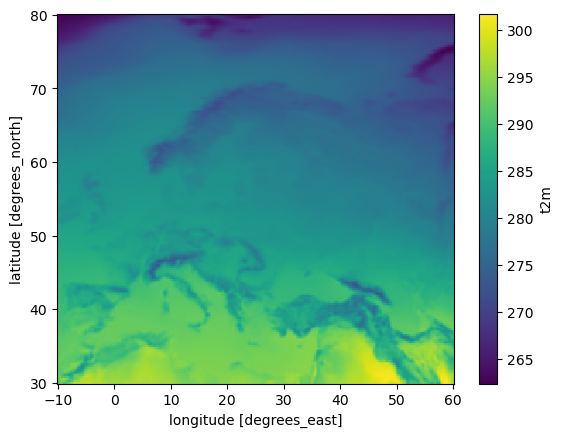

In [5]:
# A simple matplotlib plot to view the data:
era5_t_mean.t2m.plot()

### The median over the time dimension

In [6]:
era5_t_median = ekt.temporal.reduce(era5_xr, how="median")
era5_t_median

<xarray.Dataset> Size: 456kB
Dimensions:    (latitude: 201, longitude: 281)
Coordinates:
  * latitude   (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude  (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
Data variables:
    t2m        (latitude, longitude) float64 452kB 262.2 262.2 ... 298.2 294.9
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

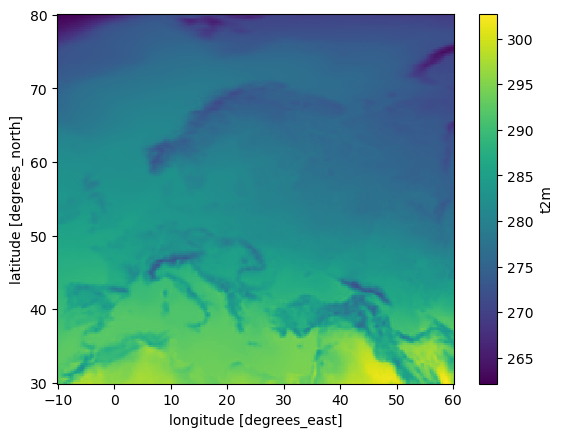

In [7]:
# A simple matplotlib plot to view the data:
era5_t_median.t2m.plot()

### Calling the temporal reduce method with an arbitary function

The `temporal.reduce` method can take any method which is accepted by the xarray reduce method, typically this means it must take `axis` as an argument. See the [xarray.Dataset.reduce](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.reduce.html) documentation for more details.

In [8]:
import numpy as np
def my_method(array, axis=None, **kwargs):
    return np.mean(array, axis=axis, **kwargs) * np.std(array, axis=axis, **kwargs)

era5_t_my_method = ekt.temporal.reduce(era5_xr, how=my_method, how_label="random")
era5_t_my_method


<xarray.Dataset> Size: 456kB
Dimensions:     (latitude: 201, longitude: 281)
Coordinates:
  * latitude    (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
Data variables:
    t2m_random  (latitude, longitude) float64 452kB 2.244e+03 ... 2.904e+03
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

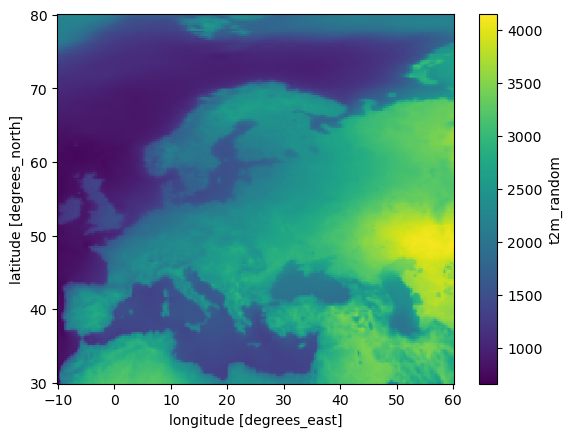

In [9]:
# A simple matplotlib plot to view the data:
era5_t_my_method.t2m_random.plot()

### Calculate a rolling mean with a 50 timestep window

There is no temporal specific method for a rolling reduction. The general rolling_reduce method can do this calculation by specifying the dimension over which you would like to reduce.

In [10]:
era5_rolling = ekt.rolling_reduce(
    era5_xr, valid_time=50, center=True,
)
era5_rolling

<xarray.Dataset> Size: 660MB
Dimensions:     (valid_time: 1460, latitude: 201, longitude: 281)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 12kB 2015-01-01 ... 2015-12-31T18...
  * latitude    (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
Data variables:
    t2m         (valid_time, latitude, longitude) float64 660MB dask.array<chunksize=(1459, 26, 36), meta=np.ndarray>
Attributes: (12/13)
    param:        2t
    paramId:      167
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    ...           ...
    date:         20150101
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF